In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = "svg"
import pprint 
import seaborn as sns
pp = pprint.PrettyPrinter(indent=4)

In [ ]:
# import sentiment and graph data
sentiment_df_dtypes = {'id':'str', 'author':'str', 'score':'float', 'upvote_ratio':'float', 'num_comments':'int',
       'subreddit':'str', 'selftext':'str', 'comments':'object', 'post_sentiment_dict':'object',
       'post_pos_sentiment':'float', 'post_neg_sentiment':'float', 'post_compound_sentiment':'float'}
# change path as per your drive 
uiuc_sentiment_df = pd.read_csv('processed_data/uiuc/uiuc_sentiment_new.csv', dtype=sentiment_df_dtypes, usecols=sentiment_df_dtypes.keys())


In [ ]:
uiuc_sentiment_df

,id,author,score,upvote_ratio,num_comments,subreddit,selftext,comments,post_sentiment_dict,post_pos_sentiment,post_neg_sentiment,post_compound_sentiment
0,qwk8hf,yourfatherssidehoe,508.0,0.96,88,UIUC,I am 21 female. And all want is a boyfriend in...,"[{'author': 'Floss-Boss', 'body': 'You had me ...","{'neg': 0.075, 'neu': 0.809, 'pos': 0.116, 'co...",0.116,0.075,0.8379
1,10sa5uj,yongjoop,406.0,0.96,70,UIUC,I am Yongjoo Park ([https://yongjoopark.com/](...,"[{'author': '_MJRY_', 'body': ""I've ran into t...","{'neg': 0.045, 'neu': 0.863, 'pos': 0.093, 'co...",0.093,0.045,0.9788
2,gme7o5,xinyuhe,416.0,0.93,62,UIUC,"Got called a ""gook"" today just sitting in a dr...","[{'author': 'k2ofcu', 'body': ""As a member of ...","{'neg': 0.129, 'neu': 0.822, 'pos': 0.049, 'co...",0.049,0.129,-0.8144
3,d3j6qj,wxhemiao,417.0,0.96,45,UIUC,# PERSON FOUND! We have confirmation from loca...,"[{'author': 'UIpolice', 'body': ""The Champaign...","{'neg': 0.018, 'neu': 0.841, 'pos': 0.14, 'com...",0.140,0.018,0.9517
4,11uacgo,wisetex,412.0,0.95,67,UIUC,HAHAHAHAHAHAHA,"[{'author': '05_legend', 'body': '#PURDONT', '...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,0.000,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...
210,irsadr,AlonePlankton,545.0,0.99,73,UIUC,Three tall men wearing ski masks approached me...,"[{'author': 'Garage_Salt', 'body': 'What the f...","{'neg': 0.068, 'neu': 0.856, 'pos': 0.076, 'co...",0.076,0.068,0.0816
211,l7adgc,AlmaHotter,439.0,0.89,60,UIUC,I don't care if you're 10 ft away and ask befo...,"[{'author': 'WubbaLubbaDubDubPwP', 'body': 'Do...","{'neg': 0.179, 'neu': 0.821, 'pos': 0.0, 'comp...",0.000,0.179,-0.9651
212,ff0ou4,AccordingCity4,457.0,0.97,40,UIUC,"If I can't stay, then I have to travel home. ...","[{'author': 'mekk_themighty', 'body': 'If I co...","{'neg': 0.082, 'neu': 0.918, 'pos': 0.0, 'comp...",0.000,0.082,-0.5122
213,is1wzr,1stPREPBatchStudent,442.0,0.97,21,UIUC,"Saturday, 9/12/2020, positivity rate is 0.25%,...","[{'author': 'Odd-Environment-5040', 'body': "">...","{'neg': 0.04, 'neu': 0.807, 'pos': 0.153, 'com...",0.153,0.040,0.8360


In [ ]:
uiuc_sentiment_df['comments'] = uiuc_sentiment_df['comments'].apply(lambda x: eval(x))
# berkeley_sentiment_df['comment_sentiment_list'] = berkeley_sentiment_df['comment_sentiment_list'].apply(lambda x: eval(x))
uiuc_sentiment_df['post_sentiment_dict'] = uiuc_sentiment_df['post_sentiment_dict'].apply(lambda x: eval(x))

In [ ]:
uiuc_sentiment_df.columns

Index(['id', 'author', 'score', 'upvote_ratio', 'num_comments', 'subreddit',
       'selftext', 'comments', 'post_sentiment_dict', 'post_pos_sentiment',
       'post_neg_sentiment', 'post_compound_sentiment'],
      dtype='object')

In [ ]:
# import centrality data
centrality_df_dtype = {'author':'str', 'btw_centrality':'float', 'deg_centrality':'float',
       'eig_centrality':'float', 'pagerank':'float', 'clustering_coeff':'float'}
uiuc_centrality_df = pd.read_csv('processed_data/uiuc/uiuc_centrality_poster.csv', dtype=centrality_df_dtype, usecols=centrality_df_dtype.keys())

In [ ]:
uiuc_regression_df = uiuc_sentiment_df[['author', 'post_pos_sentiment', 'post_neg_sentiment', 'num_comments',
       'post_compound_sentiment', 'upvote_ratio']].merge(uiuc_centrality_df, on='author', how='left')

In [ ]:
uiuc_regression_df

,author,post_pos_sentiment,post_neg_sentiment,num_comments,post_compound_sentiment,upvote_ratio,btw_centrality,deg_centrality,eig_centrality,pagerank,clustering_coeff
0,yourfatherssidehoe,0.116,0.075,88,0.8379,0.96,0.014420,0.007304,0.049348,0.000664,0.000000
1,yongjoop,0.093,0.045,70,0.9788,0.96,0.008786,0.006640,0.005407,0.000664,0.000000
2,xinyuhe,0.049,0.129,62,-0.8144,0.93,0.012454,0.005976,0.057692,0.000664,0.055556
3,wxhemiao,0.140,0.018,45,0.9517,0.96,0.004250,0.003984,0.051131,0.000664,0.066667
4,wisetex,0.000,0.000,67,0.0000,0.95,0.008263,0.006640,0.002993,0.000664,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
210,AlonePlankton,0.076,0.068,73,0.0816,0.99,0.008757,0.006640,0.052998,0.000664,0.022222
211,AlmaHotter,0.000,0.179,60,-0.9651,0.89,0.008848,0.007304,0.011866,0.000664,0.000000
212,AccordingCity4,0.000,0.082,40,-0.5122,0.97,0.007450,0.005976,0.052326,0.000664,0.027778
213,1stPREPBatchStudent,0.153,0.040,21,0.8360,0.97,0.019625,0.009960,0.069202,0.000664,0.047619


In [ ]:
uiuc_regression_avg_df = uiuc_regression_df.groupby('eig_centrality').mean()

<ipython-input-11-b385e7626933>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  uiuc_regression_avg_df = uiuc_regression_df.groupby('eig_centrality').mean()


In [ ]:
uiuc_regression_avg_df = uiuc_regression_avg_df.reset_index()

In [ ]:
# fit a univariate regression model
def fit_regression_line(y, X, regressor):
  model = sm.OLS(y, X)
  results = model.fit()

  param = results.params
  fitted = np.transpose(X) * param

  fig, ax = plt.subplots(figsize=(8,4))
  plt.plot(X, y, 'o')
  plt.plot(X, fitted ,'-', label='coefficient: ' + str(round(param[0], 2)))
  ax.set_xlabel(regressor)
  ax.set_ylabel('post_pos_sentiment')
  plt.legend()
  plt.show()

In [ ]:
def fit_regression_line_intercept(y, X, regressor):
    X = sm.add_constant(X)  # adding a constant term for intercept
    model = sm.OLS(y, X)
    results = model.fit()

    param = results.params
    fitted = np.dot(X, param)

    fig, ax = plt.subplots(figsize=(8,4))
    plt.plot(X[:, 1], y, 'o')  # X[:, 1] since X[:, 0] is the constant term
    plt.plot(X[:, 1], fitted ,'-', label='intercept: ' + str(round(param[0], 2)) +
                                        ', coefficient: ' + str(round(param[1], 2)))
    ax.set_xlabel(regressor)
    ax.set_ylabel('post_pos_sentiment')
    plt.legend()
    plt.show()



---



### eig_centrality vs post_pos_sentiment 
Model : 
<!-- $y_{agg-pos-comment-sentiment} = \beta_0 + \beta_1 \cdot X_{eig-centrality} + \beta_2 \cdot X_{post-pos-sentiment} + \beta_3 \cdot X_{num-comments} + \epsilon $
Here, we control for the post positive sentiment to make sure that the comment sentiment is not being driven by the fact that the user posted something positive which is leading other users to comment a certain way. We also control for the number of comments, since the change aggregated comment sentiment may be driven by the number of comments the post has.  -->

In [ ]:
uiuc_regression_avg_df.columns

Index(['eig_centrality', 'post_pos_sentiment', 'post_neg_sentiment',
       'num_comments', 'post_compound_sentiment', 'upvote_ratio',
       'btw_centrality', 'deg_centrality', 'pagerank', 'clustering_coeff'],
      dtype='object')

In [ ]:
# for all values of eig_centrality
X = uiuc_regression_avg_df[['eig_centrality', 'num_comments', 'upvote_ratio']].values
y = uiuc_regression_avg_df['post_pos_sentiment'].values
model = sm.OLS(y, sm.add_constant(X))
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                 -0.013
Method:                 Least Squares   F-statistic:                    0.1767
Date:                Sun, 04 Jun 2023   Prob (F-statistic):              0.912
Time:                        17:47:27   Log-Likelihood:                 154.86
No. Observations:                 188   AIC:                            -301.7
Df Residuals:                     184   BIC:                            -288.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2443      0.237      1.032      0.3

In [ ]:
# for all values of eig_centrality
X = uiuc_regression_avg_df[['eig_centrality', 'num_comments', 'upvote_ratio']].values
y = uiuc_regression_avg_df['post_compound_sentiment'].values
model = sm.OLS(y, sm.add_constant(X))
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.022
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     1.373
Date:                Sun, 04 Jun 2023   Prob (F-statistic):              0.252
Time:                        17:47:34   Log-Likelihood:                -190.52
No. Observations:                 188   AIC:                             389.0
Df Residuals:                     184   BIC:                             402.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.4634      1.486     -0.312      0.7

In [ ]:
# for all values of eig_centrality
uiuc_regression_avg_df['ln_eig_centrality'] = np.log(uiuc_regression_avg_df['eig_centrality'])
X = uiuc_regression_avg_df[['ln_eig_centrality', 'num_comments']].values
y = uiuc_regression_avg_df['post_pos_sentiment'].values
model = sm.OLS(y, sm.add_constant(X))
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.009
Method:                 Least Squares   F-statistic:                    0.1418
Date:                Sun, 04 Jun 2023   Prob (F-statistic):              0.868
Time:                        18:04:05   Log-Likelihood:                 154.73
No. Observations:                 188   AIC:                            -303.5
Df Residuals:                     185   BIC:                            -293.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1292      0.016      8.037      0.0

In [ ]:
# for all values of eig_centrality
uiuc_regression_avg_df['ln_eig_centrality'] = np.log(uiuc_regression_avg_df['eig_centrality'])
X = uiuc_regression_avg_df[['ln_eig_centrality', 'num_comments', 'upvote_ratio']].values
y = uiuc_regression_avg_df['post_neg_sentiment'].values
model = sm.OLS(y, sm.add_constant(X))
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.8767
Date:                Sun, 04 Jun 2023   Prob (F-statistic):              0.454
Time:                        18:03:38   Log-Likelihood:                 186.45
No. Observations:                 188   AIC:                            -364.9
Df Residuals:                     184   BIC:                            -351.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0935      0.200      0.467      0.6

In [ ]:
# removing outliers, i.e., very few users which have very high eigenvector centrality
X = uiuc_regression_avg_df[uiuc_regression_avg_df['eig_centrality'] < 0.15][['eig_centrality', 'num_comments', 'upvote_ratio']].values
y = uiuc_regression_avg_df[uiuc_regression_avg_df['eig_centrality'] < 0.15]['post_pos_sentiment'].values
model = sm.OLS(y, sm.add_constant(X))
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                 -0.008
Method:                 Least Squares   F-statistic:                    0.5153
Date:                Sun, 04 Jun 2023   Prob (F-statistic):              0.672
Time:                        17:48:02   Log-Likelihood:                 154.15
No. Observations:                 187   AIC:                            -300.3
Df Residuals:                     183   BIC:                            -287.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2245      0.237      0.946      0.3

In [ ]:
# removing outliers, i.e., very few users which have very high eigenvector centrality
X = uiuc_regression_avg_df[uiuc_regression_avg_df['eig_centrality'] < 0.15][['ln_eig_centrality', 'num_comments', 'upvote_ratio']].values
y = uiuc_regression_avg_df[uiuc_regression_avg_df['eig_centrality'] < 0.15]['post_pos_sentiment'].values
model = sm.OLS(y, sm.add_constant(X))
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                 -0.014
Method:                 Least Squares   F-statistic:                    0.1739
Date:                Sun, 04 Jun 2023   Prob (F-statistic):              0.914
Time:                        17:48:11   Log-Likelihood:                 153.63
No. Observations:                 187   AIC:                            -299.3
Df Residuals:                     183   BIC:                            -286.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2435      0.237      1.026      0.3

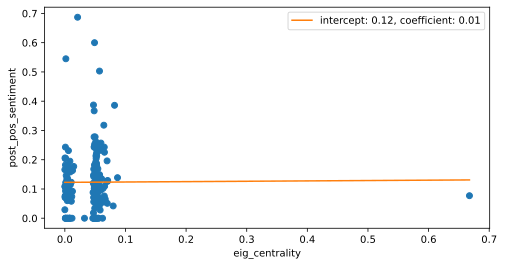

In [ ]:
fit_regression_line_intercept(uiuc_regression_avg_df['post_pos_sentiment'].values, uiuc_regression_avg_df['eig_centrality'].values, 'eig_centrality')

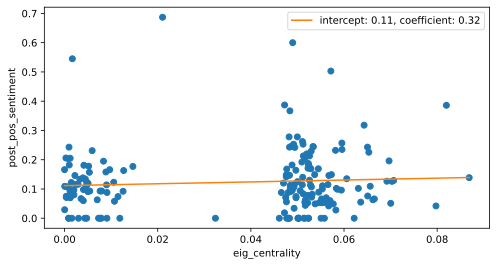

In [ ]:
fit_regression_line_intercept(uiuc_regression_avg_df[uiuc_regression_avg_df['eig_centrality'] < 0.15]['post_pos_sentiment'].values, uiuc_regression_avg_df[uiuc_regression_avg_df['eig_centrality'] < 0.15]['eig_centrality'].values, 'eig_centrality')

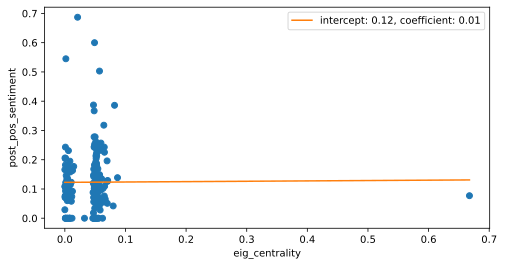

In [ ]:
fit_regression_line_intercept(uiuc_regression_avg_df['post_pos_sentiment'].values, uiuc_regression_avg_df['eig_centrality'].values, 'eig_centrality')

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
X = uiuc_regression_avg_df[['eig_centrality', 'num_comments', 'upvote_ratio', 'btw_centrality', 'deg_centrality', 'clustering_coeff']]
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['variable'] = X.columns

In [ ]:
vif

,VIF,variable
0,12.236199,eig_centrality
1,2.943493,num_comments
2,13.617587,upvote_ratio
3,31.187291,btw_centrality
4,46.770640,deg_centrality
5,2.117393,clustering_coeff


### deg_centrality vs post_pos_sentiment
<!-- Model : 
$y_{agg-pos-comment-sentiment} = \beta_0 + \beta_1 \cdot X_{deg-centrality} + \beta_2 \cdot X_{post-pos-sentiment} + \beta_3 \cdot X_{num-comments} + \epsilon $
Here, we control for the post positive sentiment to make sure that the comment sentiment is not being driven by the fact that the user posted something positive which is leading other users to comment a certain way.  -->

(array([  2.,   7.,  42., 108.,   8.,   3.,   4.,   3.,   4.,   3.,   0.,
          0.,   0.,   2.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.]),
 array([0.00265604, 0.00387118, 0.00508632, 0.00630146, 0.0075166 ,
        0.00873174, 0.00994688, 0.01116202, 0.01237716, 0.0135923 ,
        0.01480744, 0.01602258, 0.01723772, 0.01845286, 0.01966799,
        0.02088313, 0.02209827, 0.02331341, 0.02452855, 0.02574369,
        0.02695883, 0.02817397, 0.02938911, 0.

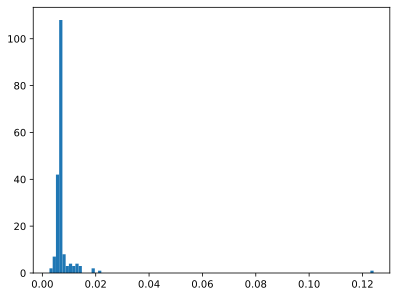

In [ ]:
plt.hist(uiuc_regression_avg_df['deg_centrality'].values, bins= 100)

In [ ]:
# for all values of eig_centrality
X = uiuc_regression_avg_df[['deg_centrality', 'num_comments', 'upvote_ratio']].values
y = uiuc_regression_avg_df['post_pos_sentiment'].values
model = sm.OLS(y, sm.add_constant(X))
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                 -0.013
Method:                 Least Squares   F-statistic:                    0.1878
Date:                Sun, 04 Jun 2023   Prob (F-statistic):              0.905
Time:                        17:48:57   Log-Likelihood:                 154.88
No. Observations:                 188   AIC:                            -301.8
Df Residuals:                     184   BIC:                            -288.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2451      0.237      1.036      0.3

In [ ]:
# for all values of eig_centrality
uiuc_regression_avg_df['ln_deg_centrality'] = np.log(uiuc_regression_avg_df['deg_centrality'])
X = uiuc_regression_avg_df[['ln_deg_centrality', 'num_comments', 'upvote_ratio']].values
y = uiuc_regression_avg_df['post_pos_sentiment'].values
model = sm.OLS(y, sm.add_constant(X))
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                 -0.012
Method:                 Least Squares   F-statistic:                    0.2792
Date:                Sun, 04 Jun 2023   Prob (F-statistic):              0.840
Time:                        17:49:03   Log-Likelihood:                 155.02
No. Observations:                 188   AIC:                            -302.0
Df Residuals:                     184   BIC:                            -289.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3137      0.266      1.177      0.2

We still get an $R^2 = 0.355$ , and we get a positive statistically significant $\beta_1$ which implies that well connected users get higher perceived social support from their peers. 

In [ ]:
# removing outliers, i.e., very few users which have very high degree centrality
X = uiuc_regression_avg_df[uiuc_regression_avg_df['deg_centrality'] < 0.02][['deg_centrality', 'num_comments', 'upvote_ratio']].values
y = uiuc_regression_avg_df[uiuc_regression_avg_df['deg_centrality'] < 0.02]['post_pos_sentiment'].values
model = sm.OLS(y, sm.add_constant(X))
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                 -0.010
Method:                 Least Squares   F-statistic:                    0.3796
Date:                Sun, 04 Jun 2023   Prob (F-statistic):              0.768
Time:                        17:49:11   Log-Likelihood:                 152.63
No. Observations:                 186   AIC:                            -297.3
Df Residuals:                     182   BIC:                            -284.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2256      0.239      0.945      0.3

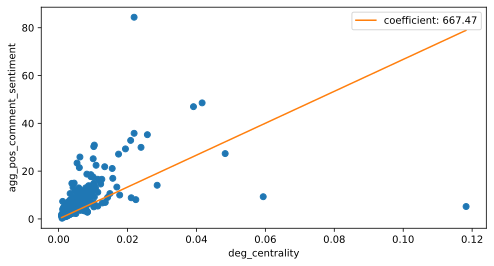

In [ ]:
# full data 
# fit_regression_line(berkeley_regression_avg_df['agg_pos_comment_sentiment'].values, berkeley_regression_avg_df['deg_centrality'].values, 'deg_centrality')

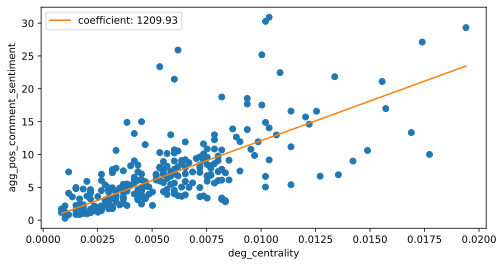

In [ ]:
# removing outliers 
# fit_regression_line(y, berkeley_regression_avg_df[berkeley_regression_avg_df['deg_centrality'] < 0.02]['deg_centrality'].values, 'deg_centrality')

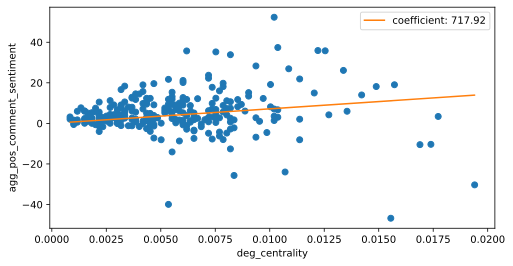

In [ ]:
# fit_regression_line(berkeley_regression_avg_df[berkeley_regression_avg_df['deg_centrality'] < 0.02]['agg_compound_comment_sentiment'].values, berkeley_regression_avg_df[berkeley_regression_avg_df['deg_centrality'] < 0.02]['deg_centrality'].values, 'deg_centrality')

### Computing VIF to check for multi-collinearity 

Clustering coefficient

In [ ]:
# for all values of eig_centrality
X = uiuc_regression_avg_df[['clustering_coeff', 'num_comments', 'upvote_ratio']].values
y = uiuc_regression_avg_df['post_pos_sentiment'].values
model = sm.OLS(y, sm.add_constant(X))
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                 -0.013
Method:                 Least Squares   F-statistic:                    0.1755
Date:                Sun, 04 Jun 2023   Prob (F-statistic):              0.913
Time:                        17:49:32   Log-Likelihood:                 154.86
No. Observations:                 188   AIC:                            -301.7
Df Residuals:                     184   BIC:                            -288.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2449      0.237      1.035      0.3